In [3]:
import numpy as np
import pylab as pl
import ot
import scipy
import scipy.stats

In [115]:
N = 3
d = 2
n_i = np.random.randint(low=50, high=80)  # nb samples

measures_locations = []
measures_weights = []

for i in range(N):
    b_i = np.array([1]*n_i)
    b_i = b_i / np.sum(b_i)
    
    x_i = np.random.laplace(size=[n_i,2])
    measures_locations.append(x_i)
    measures_weights.append(b_i)

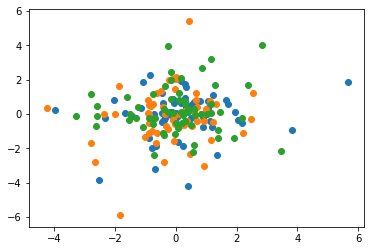

In [116]:
pl.figure(1)
for (x_i, b_i) in zip(measures_locations, measures_weights):
    color = np.random.randint(low=1, high=10 * N)
    pl.scatter(x_i[:, 0], x_i[:, 1], label='input measure')
pl.show()

In [117]:
k = 90  # number of Diracs of the barycenter
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations

X_joint = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, weights=np.array([1/N]*N))


In [118]:
X_12 = ot.lp.free_support_barycenter(measures_locations[:2], measures_weights[:2], X_init, weights=np.array([1/2,1/2]))

measures_12_3 = [X_12, measures_locations[2]]
weights = [np.ones(len(X_12))/len(X_12), np.ones(len(measures_locations[2]))/len(measures_locations[2])]
smallest = float("inf")
smallestBeta = -1
dots = []
for i in np.arange(0,1,0.001):
    X_3 = ot.lp.free_support_barycenter(measures_12_3,
                                weights,
                                X_init,
                                weights=np.array([i, 1-i])
                                                                          ,stopThr=10e-8,numItermax=1000)
    M = ot.dist(X_3, X_joint)
    a,b = np.ones((len(X_3),)) / len(X_3), np.ones((len(X_joint),))/len(X_joint)
    G0 = ot.emd(a,b,M)
    dist = np.sum(np.multiply(M,G0))
    if (dist < smallest):
        smallest = dist
        smallestBeta = i
    dots.append( dist )
print(smallestBeta)

0.643


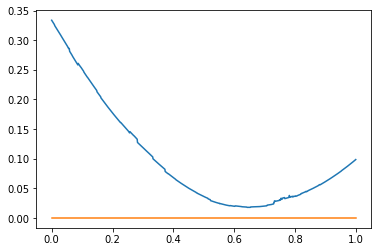

In [119]:
pl.figure(1)
pl.plot(np.arange(0,1,0.001), dots)
pl.plot([0,1],[0,0])

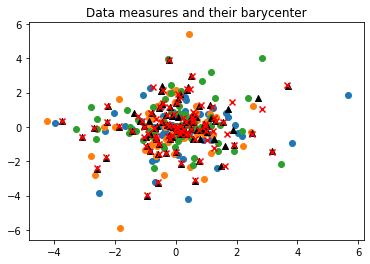

In [120]:
i=smallestBeta
X_3 = ot.lp.free_support_barycenter(measures_12_3,
                                weights,
                                X_init,
                                weights=np.array([i, 1-i])
                                    ,stopThr=10e-8,numItermax=1000)
pl.figure(1)
for (x_i, b_i) in zip(measures_locations, measures_weights):
    color = np.random.randint(low=1, high=10 * N)
    pl.scatter(x_i[:, 0], x_i[:, 1], label='input measure')
pl.scatter(X_joint[:, 0], X_joint[:, 1], c='black', marker='^', label='2-Wasserstein barycenter')
pl.scatter(X_3[:, 0], X_3[:, 1], c='red', marker='x', label='2-Wasserstein barycenter for 1,2')

pl.title('Data measures and their barycenter')
pl.show()

In [121]:
print(X_3 - X_joint)


[[-6.35448216e-02 -3.29461376e-02]
 [ 4.86356100e-02  7.54590834e-02]
 [-2.78261687e-02  1.68908848e-01]
 [ 1.01345078e-02  1.58047587e-02]
 [ 5.17876153e-02 -8.74124380e-02]
 [ 6.33899428e-03  2.46352136e-02]
 [ 8.65085549e-03 -4.26749425e-03]
 [-1.49411433e-01  2.78486954e-01]
 [ 1.10720653e-01  6.08725072e-03]
 [ 6.54704627e-03  4.41912871e-02]
 [-2.20060265e-01 -2.29317734e-02]
 [ 2.28150097e-02  9.45816758e-03]
 [-2.01113527e-02 -4.23488704e-02]
 [ 1.14765569e+00 -2.17151676e-02]
 [-1.58712502e-01  3.10179276e-02]
 [ 1.43953951e-01 -5.60894052e-02]
 [-4.05857466e-02  3.78697645e-03]
 [ 4.35215198e-03  1.52738789e-02]
 [-1.84848690e-01 -2.44658220e-01]
 [ 7.84463890e-03 -4.63566190e-02]
 [-6.86136003e-03 -5.12454445e-03]
 [-3.78805311e-01 -1.07599008e-01]
 [-6.90831183e-03  6.73638853e-03]
 [-3.96278446e-03 -1.13915682e-03]
 [ 5.12995486e-03  8.22517287e-03]
 [ 7.64770872e-03  5.77614536e-02]
 [ 1.09133735e-01 -3.57400540e-02]
 [-1.12821880e-02  4.97221033e-02]
 [-6.41325234e-02 -6